# Regression - Linear Regression - Predicting House Process

**Linear Regression** is an approach for modeling the relationship between a scalar dependent variable *y* and one or more explanatory variables (or independent variables) denoted *X*. The case of one explanatory variable is called *simple linear regression*. For more than one explanatory variable, the process is called *multiple linear regression*. When multiple correlated dependent variables are predicted, rather than a single scalar variable then it is known as *multivariate linear regression*.

%%latex 
\hfill

Goal of this Notebook:

- Demonstrate conceptual understanding of Linear Regression and how it "works".
- Getting familiar with the key concepts.
- Exploratory Data Analysis of Housing Dataset house sales in King County, the region where the city of Seattle, WA is located.
- Apply Linear Regression to a House Price Prediction Machine Learning problem using python scikit-learn module.
- Interpret Linear Regression Model Coefficients
- Compare between Linear Regression Models with different sets of features from simple to complex.
- Understanding of RMSE evaluation metrics for regression.

In [1]:
# machine learning
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

##Load King County house sales data

Dataset is from house sales in King County, the region where the city of Seattle, WA is located.

In [4]:
sales = pd.read_csv('home_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Let's see how many attributes of an house we have

In [5]:
print(sales.columns)
print(len(sales.columns))

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
21


We have 21 attributes for each house.

## Exploring the data for housing sales 
We use a **scatter plot** to visualize the relationship between the different house features and the price.

D:\Work\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


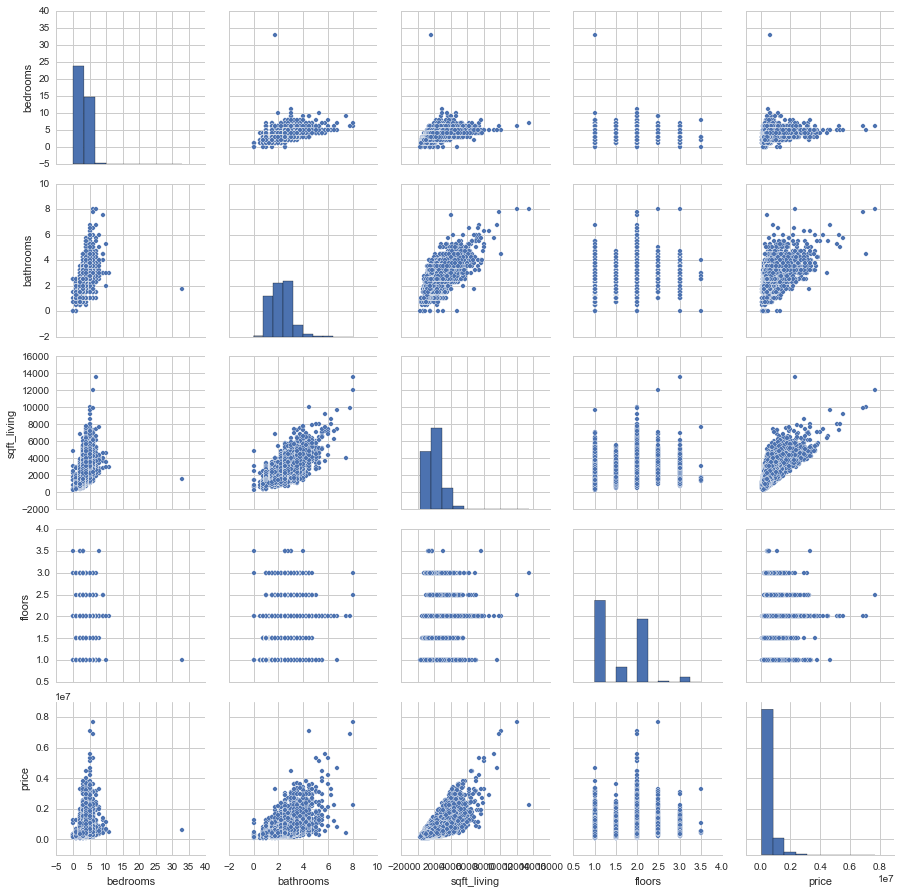

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(sales[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'price']], size=2.5);

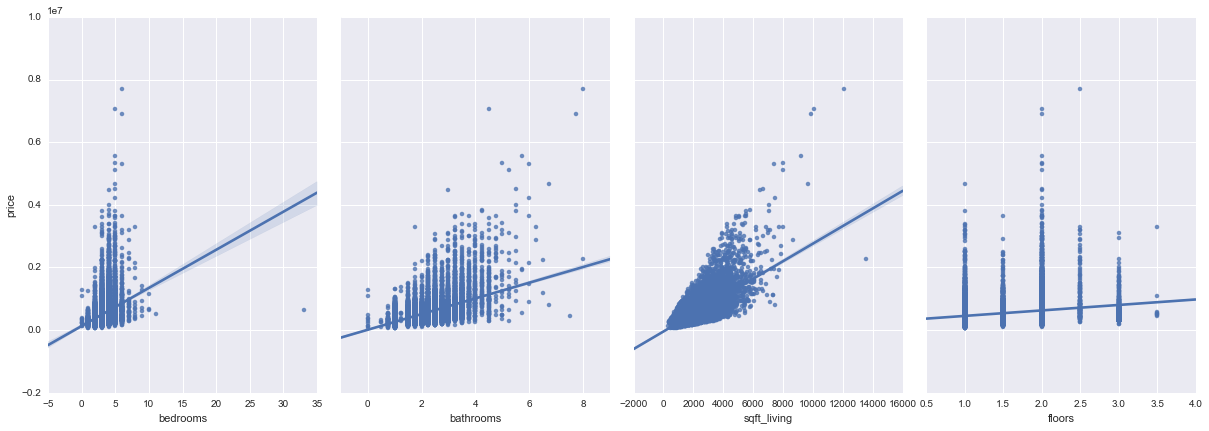

In [99]:
sns.set(style='whitegrid', context='notebook')
# scatter plot the data and also include a "regression line"
sns.pairplot(sales, x_vars=['bedrooms', 'bathrooms', 'sqft_living', 'floors'],
                                                     y_vars='price', size=6, aspect=0.7, kind='reg')

Clearly the **number of bedrooms** and the **living area** has larger influence on the price of a house.

%%latex 
\hfill

We use a **correlation matrix** to visualize the correlation between all numerical variables. A **correlation matrix** is used to investigate the dependence between multiple variables at the same time. The result is a table containing the correlation coefficients between each variable and the others.

In [100]:
sales[['bedrooms', 'bathrooms', 'sqft_living', 'floors']].corr()

,bedrooms,bathrooms,sqft_living,floors
bedrooms,1.000000,0.515884,0.576671,0.175429
bathrooms,0.515884,1.000000,0.754665,0.500653
sqft_living,0.576671,0.754665,1.000000,0.353949
floors,0.175429,0.500653,0.353949,1.000000


**Observations:** *sqft_living* has high correlations with all other variables such as number of bedrooms, number of bathrooms but not number of floors. Indeed, area of living does not determine the number of floors of a house, it is usually driven by the design, permission of the authorities and the number of members in the family. A small house can have many floors but the cumulative sq. ft area of living can still be low. However, if one has a larger living area he will tend to create more bedrooms and bathrooms. If the number of floors is higher then one tends to create at least one bathroom in each floor which is also depicted in the fact that number of floors have the best correlation with the number of bathrooms.

%%latex 
\hfill

Another way of observing **correlation** between features is through a **heatmap**.

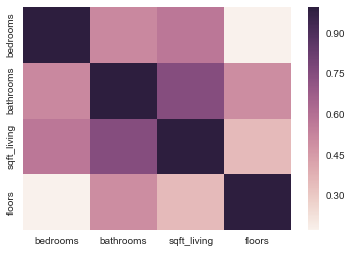

In [101]:
# heatmap with ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
sns.heatmap(sales[['bedrooms', 'bathrooms', 'sqft_living', 'floors']].corr())

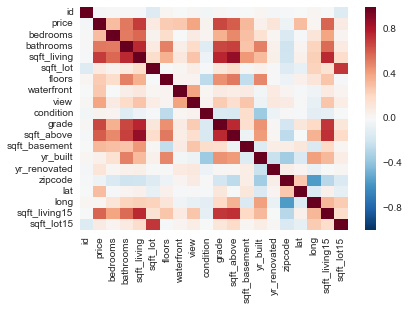

In [102]:
# heatmap with all features
sns.heatmap(sales.corr())

**Observations:** *zipcode* has the least correlations with all other features.

## Simple Linear Regression

Simple linear regression is an approach for predicting a **continuous response** using a **single feature**. It takes the following form:

$y = \beta_0 + \beta_1x$

- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

$\beta_0$ and $\beta_1$ are called the **model coefficients**:

- The Linear Regression model "learns" the values of these coefficients to create a suitable Linear Regression model.
- And once these coefficients are learned, we can use the model to predict Prices of the houses.

### Estimating ("learning") model coefficients

- Coefficients are estimated during the model fitting process using the **least squares criterion**.
- We find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").

![estimating_coefficients](ML-CSCE-685-Linear-Regression_files/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of x and y.
- The blue line is the **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Let's estimate the model coefficients for the housing data with a single feature:

## Create a simple regression model of sq. ft. living area to price

Split data into training and testing, 80% training and 20% testing. We use random_state=1 so that everyone running this notebook gets the same results. In practice, you may set a random seed.

In [104]:
y = sales['price']

In [105]:
# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(sales, y, train_size=0.8, random_state=1)

##Build the Linear Regression Model using only sq. ft. living area as a feature

In [106]:
sqft_feature = ['sqft_living']

In [107]:
# Create a linear regression object to be used with sqft_feature
sqft_model = LinearRegression()

In [108]:
# train the linear regression object to create a model
sqft_model.fit(X_train[sqft_feature], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [109]:
# display the intercept and feature coefficients of the model
print_all_coeffcients(sqft_feature, sqft_model)

,Co-effcients,Value
0,Intercept,-30186.358515
1,sqft_living,273.821810


### Interpreting model coefficients

How do we interpret the sqft_living coefficient ($\beta_1$)?

- A "unit" increase in sq. ft. area of living is **associated with** a 273.821810 "unit" increase in Price of the house.
- Meaning: An additional 1,00 sq. ft area of living is **associated with** an increase in Prices of $27382.18.

If an increase in sq. ft. area of living was associated with a **decrease** in price, $\beta_1$ would have been **negative**.

### Evaluate the simple sq. ft. model

In [110]:
# predict values of Sales from test data for a given feature set
# Root Mean Squared Error (RMSE) with only sqft as the feature
print("Root Mean Squared Error (RMSE) with only sqft_living: $%.2f" 
        % np.sqrt(metrics.mean_squared_error(sqft_model.predict(X_test[sqft_feature]), y_test)))

Root Mean Squared Error (RMSE) with only sqft_living: $292797.84


###Let's see what our predictions look like

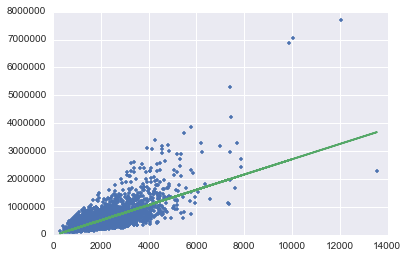

In [111]:
# Plot outputs
plt.plot(X_test[sqft_feature], y_test,'.',
                 X_test[sqft_feature], sqft_model.predict(X_test[sqft_feature]),'-')

### Using the model for prediction

Let's say that there is a new house up for sale and it has a living area of **1,250** sq. ft. What would we predict for the Price of that house?

$$y = \beta_0 + \beta_1x$$
$$y = -30186.358515 + 273.821810 \times 1250$$

In [112]:
# manually calculate the prediction
-30186.358515 + 273.821810 * 1250

312090.903985

In [113]:
# predict for a new observation
sqft_model.predict(1250)

array([ 312090.90420165])

**Note:** The scale of the features is **irrelevant** for linear regression models, since it will only affect the scale of the coefficients, and we can simply change our interpretation of the coefficients.

## Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features, which is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient:

$y = \beta_0 + \beta_1 \times Bedrooms + \beta_2 \times Bathrooms + \beta_3 \times SqftLiving + \beta_4 \times Floors + \beta_5 \times Zipcode$

##Explore more features in the data

To build a elaborate model, we need to explore using more features.

In [114]:
more_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

##Build a Linear Regression Model with more features

In [115]:
# Create a linear regression object to be used with limited_features
more_model = LinearRegression()

In [116]:
more_model.fit(X_train[more_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [117]:
print_all_coeffcients(more_features, more_model)

,Co-effcients,Value
0,Intercept,-57160903.273122
1,bedrooms,-53733.766829
2,bathrooms,9442.009769
3,sqft_living,308.769115
4,sqft_lot,-0.259689
5,floors,-122.379357
6,zipcode,583.446540


###Comparing the results of the simple model with adding more features

In [118]:
# predict values of Sales from test data for a given feature set
# Root Mean Squared Error (RMSE) with only sqft as the feature
print("Root Mean Squared Error (RMSE) with only sqft_living: $%.2f" 
        % np.sqrt(metrics.mean_squared_error(sqft_model.predict(X_test[sqft_feature]), y_test)))

print("Root Mean Squared Error (RMSE) with more features: $%.2f" 
        % np.sqrt(metrics.mean_squared_error(more_model.predict(X_test[more_features]), y_test)))

Root Mean Squared Error (RMSE) with only sqft_living: $292797.84
Root Mean Squared Error (RMSE) with more features: $286307.41


The RMSE goes down from \$292,797 to \$286,307 with more features.

##Explore advanced features in the data

To build a more elaborate model, we need to explore using advanced features.

In [119]:
advanced_features = \
[ 
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', \
'condition', # condition of house				 
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

##Build a Linear Regression Model with advanced features

In [120]:
# Create a linear regression object to be used with advanced_features
advanced_model = LinearRegression()

In [121]:
advanced_model.fit(X_train[advanced_features], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
print_all_coeffcients(advanced_features, advanced_model)

,Co-effcients,Value
0,Intercept,3956633.603784
1,bedrooms,-32027.930690
2,bathrooms,36040.920063
3,sqft_living,106.391429
4,sqft_lot,0.132288
5,floors,10134.875619
6,zipcode,-549.685016
7,condition,27663.223689
8,grade,95565.154789
9,waterfront,538860.460313


###Comparing the results of the simple model, more features model and advanced features model

In [123]:
# predict values of Sales from test data for a given feature set
# Root Mean Squared Error (RMSE) with only sqft as the feature
print("Root Mean Squared Error (RMSE) with only sqft_living: $%.2f" 
      % np.sqrt(metrics.mean_squared_error(sqft_model.predict(X_test[sqft_feature]), y_test)))

print("Root Mean Squared Error (RMSE) with more features: $%.2f" 
      % np.sqrt(metrics.mean_squared_error(more_model.predict(X_test[more_features]), y_test)))

print("Root Mean Squared Error (RMSE) with advanced features: $%.2f" 
      % np.sqrt(metrics.mean_squared_error(advanced_model.predict(X_test[advanced_features]), y_test)))

Root Mean Squared Error (RMSE) with only sqft_living: $292797.84
Root Mean Squared Error (RMSE) with more features: $286307.41
Root Mean Squared Error (RMSE) with advanced features: $232850.36


The RMSE goes down from \$292,797 to \$232,850 with advanced features.

In [103]:
# Utility function to print the intercept and coefficients in a nice tabular structure
def print_all_coeffcients(linear_reg_features, linear_reg_model):
    coeffs_matrix = pd.DataFrame(zip(linear_reg_features, linear_reg_model.coef_), 
                                                             columns=['Co-effcients', 'Value'])
    intercept_row = pd.DataFrame({"Co-effcients": 'Intercept', 
                                              "Value": linear_reg_model.intercept_}, index=[0])
    coeffs_matrix = pd.concat([intercept_row, coeffs_matrix]).reset_index(drop=True)
    
    return coeffs_matrix

## Comparing linear regression with other models

Advantages of linear regression:

- It is quite simple to explain and Model training and prediction are fast
- Features don't need scaling
- Can perform well with a small number of observations

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Sensitive to irrelevant features

## Coming Up

- Linear Regression with Regualrization

**References:**

[1] https://github.com/anindya-saha My Own Machine Learning Github Repo

[2] https://github.com/justmarkham Github repo of Kevin Markham, Accomplished Data Science trainer and founder of http://dataschool.io

[3] https://en.wikipedia.org/wiki/Linear_regression